In [2]:
import pandas as pd 
import numpy as np
import re
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from collections import Counter
from collections import defaultdict

In [3]:
data = pd.read_csv('spam.csv')

## Data Cleaning and Prepocessing

In [4]:
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(f'[{string.punctuation}]', '', text)
    # Remove stopwords
    text = ' '.join(word for word in text.split() if word not in ENGLISH_STOP_WORDS)
    return text

# Define the remove stop words function
def remove_stop_words(text):
    tokens = text.split()
    filtered_tokens = [token for token in tokens if token not in ENGLISH_STOP_WORDS]
    return ' '.join(filtered_tokens)

# Apply the cleaning functions
data['Message'] = data['Message'].apply(clean_text).apply(remove_stop_words)

print(data.head())


  Category                                            Message
0      ham  jurong point crazy available bugis n great wor...
1      ham                            ok lar joking wif u oni
2     spam  free entry 2 wkly comp win fa cup final tkts 2...
3      ham                        u dun say early hor u c say
4      ham                      nah dont think goes usf lives


## TF-IDF

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X = data['Message']
y = data['Category'].apply(lambda x: 1 if x == 'spam' else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TfidfVec normalizes
tfidf_vectorizer = TfidfVectorizer(max_features=3000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [6]:
feature_names = tfidf_vectorizer.get_feature_names_out()

tfidf_df = pd.DataFrame(X_train_tfidf.toarray(), columns=feature_names)

# Display the first few rows of the DataFrame
print(tfidf_df.head())

   020603  0207  02073162414  020903  0578  071104  07123456789  07734396839  \
0     0.0   0.0          0.0     0.0   0.0     0.0          0.0          0.0   
1     0.0   0.0          0.0     0.0   0.0     0.0          0.0          0.0   
2     0.0   0.0          0.0     0.0   0.0     0.0          0.0          0.0   
3     0.0   0.0          0.0     0.0   0.0     0.0          0.0          0.0   
4     0.0   0.0          0.0     0.0   0.0     0.0          0.0          0.0   

   0776xxxxxxx  07786200117  ...  youve   yr  yrs  yummy  yun  yuo  yup  zed  \
0          0.0          0.0  ...    0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0   
1          0.0          0.0  ...    0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0   
2          0.0          0.0  ...    0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0   
3          0.0          0.0  ...    0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0   
4          0.0          0.0  ...    0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0   

   zoe  üll  
0  0.0  0.0  
1  0.0  0.

In [7]:
#Analyzing Non-zero Features
document_vector = tfidf_df.iloc[0]
non_zero_features = document_vector[document_vector > 0]
print(non_zero_features.sort_values(ascending=False))

held       0.389274
87239      0.365328
cup        0.349554
weekly     0.293788
world      0.284566
end        0.281332
100        0.275464
service    0.261294
win        0.252072
reply      0.219999
stop       0.219999
send       0.204650
Name: 0, dtype: float64


## EDA

In [8]:
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [9]:
tfidf_df

,020603,0207,02073162414,020903,0578,071104,07123456789,07734396839,0776xxxxxxx,07786200117,...,youve,yr,yrs,yummy,yun,yuo,yup,zed,zoe,üll
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:


pca = PCA(n_components=20)
reduced = pca.fit_transform(tfidf_df) 
reduced.shape
pca

#reduced_df = pd.DataFrame(reduced, columns=['pc1','pc2']).join(y)

#sns.scatterplot(data=reduced_df, x='pc1', y='pc2', hue='Category')
#plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')




PCA(n_components=20)

IndexError: index 0 is out of bounds for axis 0 with size 0

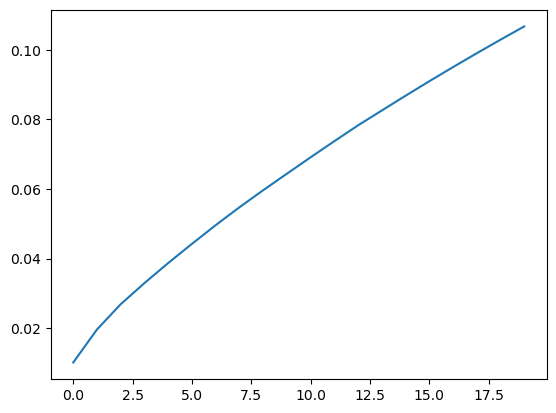

In [17]:
var_exp_thresh = 0.80
total_var_exp = np.cumsum(pca.explained_variance_ratio_)
plt.plot(total_var_exp);
pcindex = np.where(total_var_exp>=var_exp_thresh)[0]
print(f'take up to PC {pcindex[0]} to get to {var_exp_thresh}% variance explained')

In [18]:
pca.explained_variance_ratio_

array([0.01011384, 0.00949226, 0.00726757, 0.00607057, 0.00576509,
       0.00551437, 0.00536689, 0.0051433 , 0.0049055 , 0.00474605,
       0.00472607, 0.00463028, 0.00456269, 0.00426457, 0.00424011,
       0.00416512, 0.00406643, 0.00398085, 0.00390357, 0.00380396])

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

# Assuming you have a dataset in CSV format with columns 'text' and 'label'
# 'text' column contains email text, and 'label' column contains spam or non-spam labels (e.g., 0 for non-spam, 1 for spam)

# Load the dataset
dataset = pd.read_csv('spam.csv')

# Split the dataset into features (X) and labels (y)
X = dataset['Message']
y = dataset['Category']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a pipeline for preprocessing and modeling
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Convert text to TF-IDF features
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))  # Random Forest classifier
])

# Train the model
pipeline.fit(X_train, y_train)

# Evaluate the model
accuracy = pipeline.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9829596412556054


In [28]:
dataset['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [29]:
747/ 5572

0.13406317300789664

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
import numpy as np

# Load the dataset
dataset = pd.read_csv('spam.csv')

# Split the dataset into features (X) and labels (y)
X = dataset['Message']
y = dataset['Category']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a pipeline for preprocessing and modeling
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Convert text to TF-IDF features
    ('gmm', GaussianMixture())  # Gaussian Mixture Model for clustering
])

# Define the parameter grid to search
param_grid = {
    'tfidf__max_features': [1000, 2000, None],
    'tfidf__ngram_range': [(1, 1), (1, 2)],  # unigrams or bigrams
    'gmm__n_components': [2, 3]  # Number of clusters for GMM
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train.values, y_train)

# Print the best parameters found
print("Best parameters found:")
print(grid_search.best_params_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test accuracy with best model:", test_accuracy)

ValueError: 
All the 60 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/mijinson/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mijinson/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mijinson/anaconda3/lib/python3.11/site-packages/sklearn/pipeline.py", line 420, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/mijinson/anaconda3/lib/python3.11/site-packages/sklearn/mixture/_base.py", line 181, in fit
    self.fit_predict(X, y)
  File "/Users/mijinson/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mijinson/anaconda3/lib/python3.11/site-packages/sklearn/mixture/_base.py", line 212, in fit_predict
    X = self._validate_data(X, dtype=[np.float64, np.float32], ensure_min_samples=2)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mijinson/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 604, in _validate_data
    out = check_array(X, input_name="X", **check_params)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mijinson/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py", line 883, in check_array
    array = _ensure_sparse_format(
            ^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mijinson/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py", line 534, in _ensure_sparse_format
    raise TypeError(
TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.


In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
import numpy as np

# Load the dataset
dataset = pd.read_csv('spam.csv')

# Split the dataset into features (X) and labels (y)
X = dataset['Message']
y = dataset['Category']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a pipeline for preprocessing and modeling
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Convert text to TF-IDF features
    ('gmm', GaussianMixture(n_components=2))  # Gaussian Mixture Model with 2 clusters
])

# Fit the pipeline on training data
pipeline.fit(X_train.values)

# Predict the cluster labels for test data
cluster_labels = pipeline.named_steps['gmm'].predict(pipeline.named_steps['tfidf'].transform(X_test))

# Assuming '0' is non-spam and '1' is spam, we can convert cluster labels to predicted labels
predicted_labels = [1 if label == cluster_labels[0] else 0 for label in cluster_labels]

# Evaluate the model
accuracy = (predicted_labels == y_test).mean()
print("Test accuracy:", accuracy)

AttributeError: 'Series' object has no attribute 'toarray'